"""Make sure there's a `data` folder at the same level as the `src` folder before running this script. It should contain all the necessary dataset files for the code to work correctly."""


✅ Model Evaluation Complete!

📉 RMSE (Root Mean Squared Error): 0.0104
📊 MAE (Mean Absolute Error): 0.0035
📈 R² Score (Coefficient of Determination): 0.9061

📸 Scatter plot saved as 'evaluation_plot.png'.


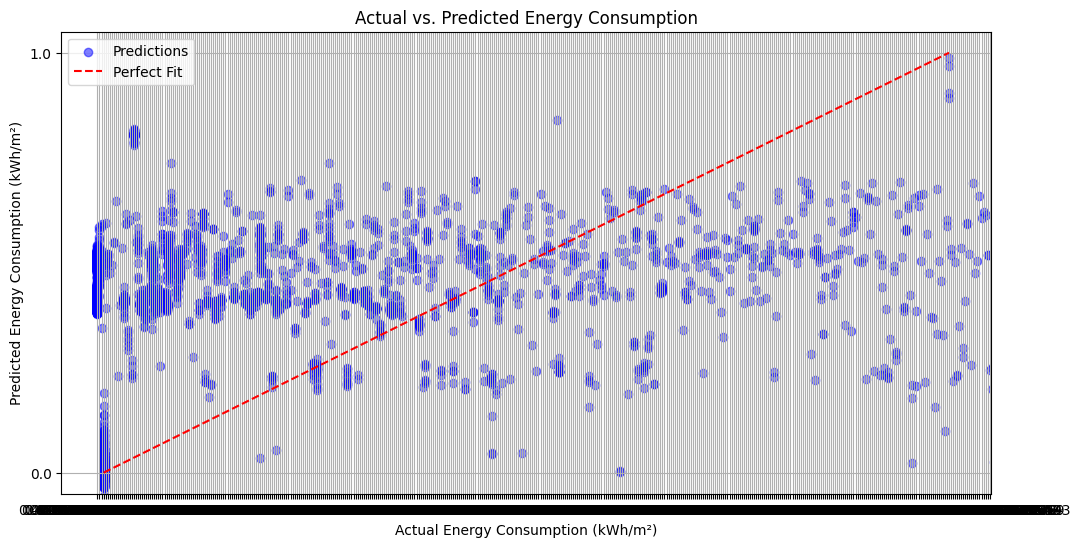


📁 Predictions saved as 'final_predictions.csv'.


In [7]:
import os
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the directory of the current script
script_dir = os.getcwd()

# Construct the file path dynamically for input dataset
data_folder = os.path.join(script_dir, "..", "data")
file_path = os.path.join(data_folder, "preprocessed_data.npz")
model_folder = os.path.join(script_dir, "..", "models")
model_file_path = os.path.join(model_folder, "xgb_energy_model.pkl")

# Ensure the data folder exists
os.makedirs(data_folder, exist_ok=True)
os.makedirs(model_folder, exist_ok=True)

# 🔹 Load preprocessed test data
data = np.load(file_path, allow_pickle=True)
X_test, y_test = data["X_test"], data["y_test"]

# 🔹 Load the trained XGBoost model
xgb_regressor = joblib.load(model_file_path)

# 🔹 Generate predictions
y_pred = xgb_regressor.predict(X_test)

# 🔹 Compute Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)           # Mean Absolute Error
r2 = r2_score(y_test, y_pred)                       # R² Score

# 🔹 Print Evaluation Results
print("\n✅ Model Evaluation Complete!\n")
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"📊 MAE (Mean Absolute Error): {mae:.4f}")
print(f"📈 R² Score (Coefficient of Determination): {r2:.4f}")

# 🔹 Save results for further analysis
file_path = os.path.join(data_folder, "evaluation_results.npz")
np.savez(file_path, y_test=y_test, y_pred=y_pred)

# 🔹 Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", label="Perfect Fit")
plt.xlabel("Actual Energy Consumption (kWh/m²)")
plt.ylabel("Predicted Energy Consumption (kWh/m²)")
plt.title("Actual vs. Predicted Energy Consumption")
plt.legend()
plt.grid()
# 🔹 Save the plot as an image
plt.savefig("evaluation_plot.png", dpi=300, bbox_inches="tight")
print("\n📸 Scatter plot saved as 'evaluation_plot.png'.")
plt.show()

# 🔹 Save predictions for submission
file_path = os.path.join(data_folder, "final_predictions.csv")
np.savetxt(file_path, y_pred, delimiter=",", header="Predicted Energy Consumption (kWh/m²)", comments="")

print("\n📁 Predictions saved as 'final_predictions.csv'.")